In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
#load file
df = pd.read_csv("opsd_germany_daily.csv", index_col=0)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
#describe
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [6]:
#transform the data into datetime
df.index = pd.to_datetime(df.index)

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

<Figure size 864x576 with 0 Axes>

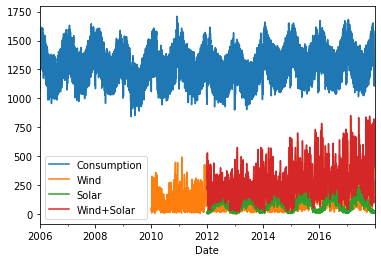

In [16]:
#1.ploting and understanding a time serise
#consumption(blue)&production(r)
plt.figure(figsize =(12,8))
df.plot()
plt.show()

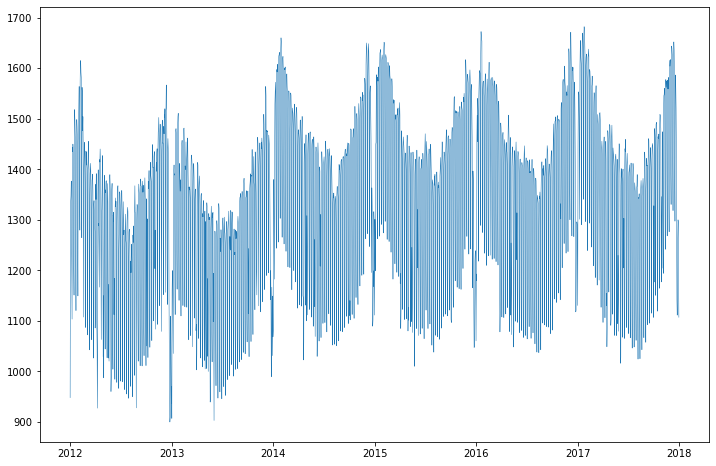

In [19]:
plt.figure(figsize=(12,8))
plt.plot(df.loc["2012-01":"2017-12"]["Consumption"], linewidth=0.5, label = "Consumption")
plt.show()

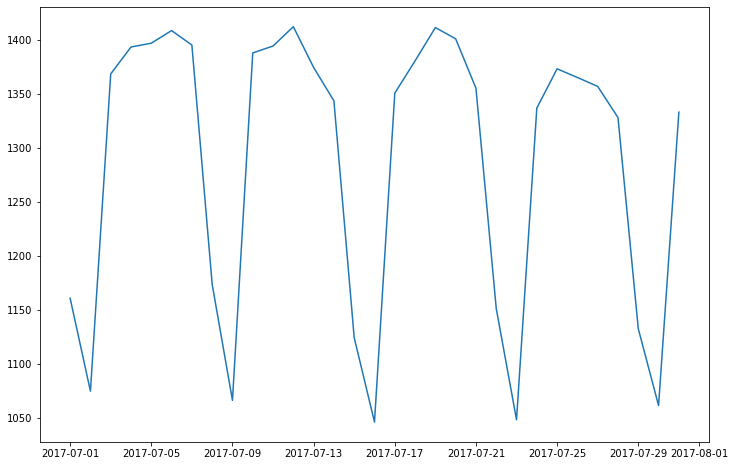

In [21]:
#Q2 change the scale
#plotting over a months
plt.figure(figsize=(12,8))
plt.plot(df.loc["2017-07-01":"2017-07-31"]["Consumption"])
plt.show()

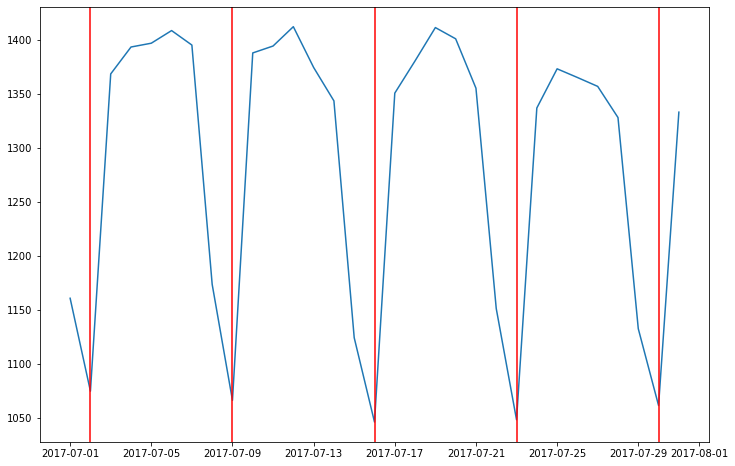

In [23]:
#plot on Sundays
plt.figure(figsize=(12,8))
plt.plot(df.loc["2017-07-01":"2017-07-31"]["Consumption"])
plt.axvline(pd.to_datetime("2017-07-02"), c='r')
plt.axvline(pd.to_datetime("2017-07-09"), c='r')
plt.axvline(pd.to_datetime("2017-07-16"), c='r')
plt.axvline(pd.to_datetime("2017-07-23"), c='r')
plt.axvline(pd.to_datetime("2017-07-30"), c='r')
plt.show()

In [26]:
#Q3 Further exploration
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2["year"] = [d.year for d in df_2.Date]
df_2['month'] = [d.strftime("%b") for d in df_2.Date]
years = df_2['year'].unique()
print(years)
df_2.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


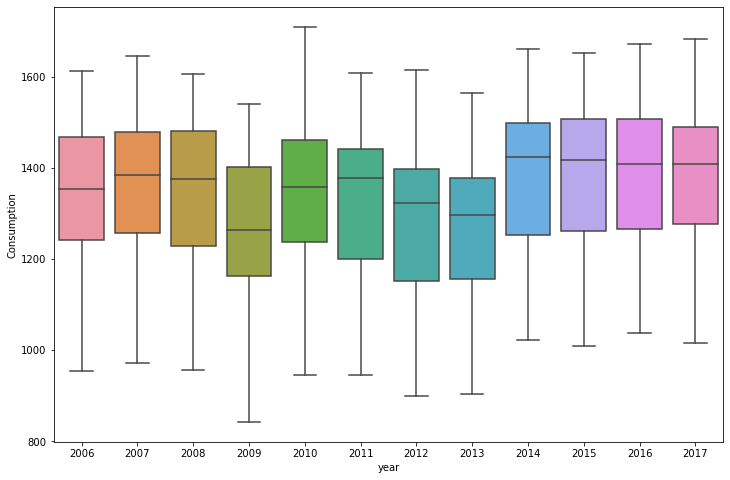

In [28]:
#boxplot year
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(x="year", y= "Consumption", data=df_2)
plt.show()

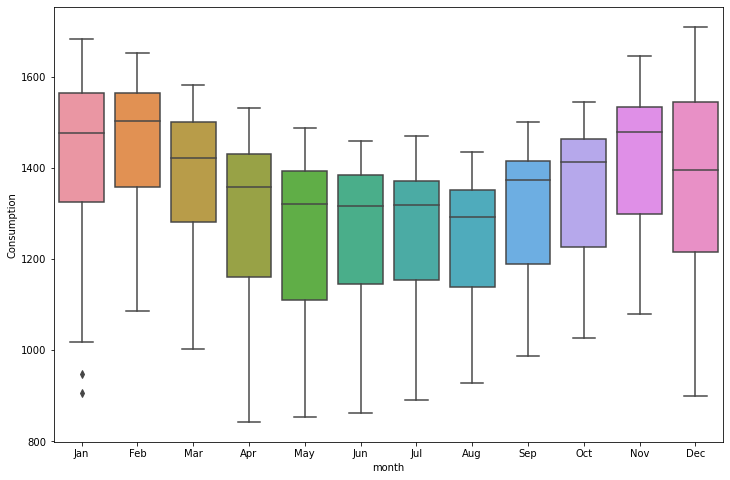

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x="month", y= "Consumption", data=df_2)
plt.show()

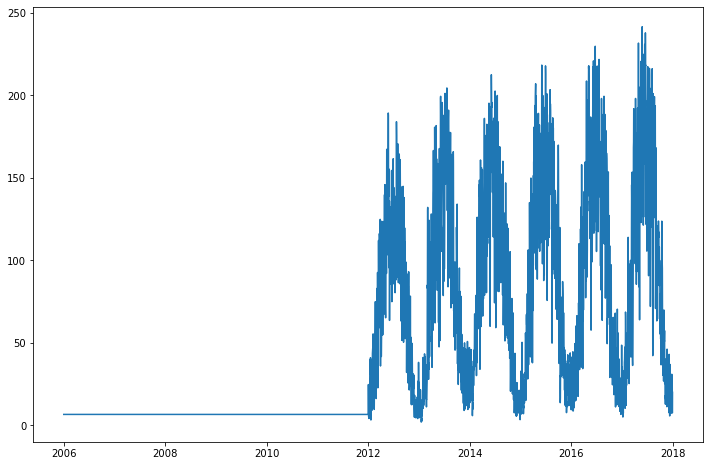

In [30]:
#Q4 filling missing values
#Plot Solar
plt.figure(figsize=(12,8))
plt.plot(df["Solar"].bfill(axis=0))
plt.show()

In [31]:
#Q5 Series correlation
#correlation between Solar and Wind production
df["Solar"]["2012-01-01":].corr(df["Wind"]["2012-01-01":])

-0.3088318295977341

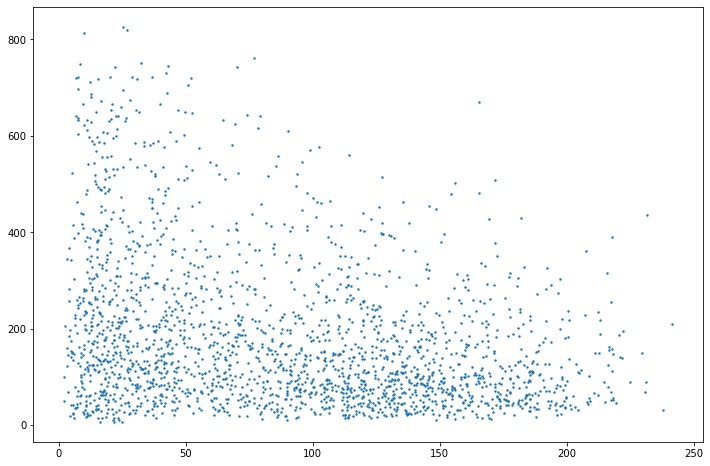

In [33]:
#plot
plt.figure(figsize=(12,8))
plt.scatter(df["Solar"]["2012-01-01":], df["Wind"]["2012-01-01":], s=2)
plt.show()

In [34]:
#correlation between consumption and Wind production
df["Consumption"]["2012-01-01":].corr(df["Wind"]["2012-01-01":])

0.13518640075918514

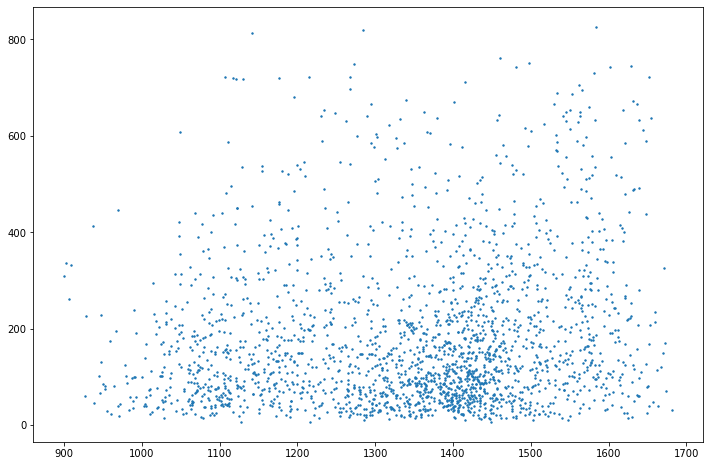

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(df["Consumption"]["2012-01-01":], df["Wind"]["2012-01-01":], s=2)
plt.show()